# CAPSTONE PROJECT: BATTLE OF THE NEIGHBORHOODS:
## Finding a Trendy Apartment in North New Jersey
### Final Peer-Project: Coursera: Applied Data Science Capstone
### Student: James Hannon

## 1.	PURPOSE:

This is the 5th week final peer-review assignment for the Coursera Capstone Course for Data Science and the culmination of the IBM Data Science Professional Certificate program.

**Assignment**

In this week, you will continue working on your capstone project. Please remember by the end of this week, you will need to submit the following:

### A full report consisting of all of the following components (15 marks):
- Introduction where you discuss the business problem and who would be interested in this project.
- Data where you describe the data that will be used to solve the problem and the source of the data.
- Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.
- Results section where you discuss the results.
- Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
- Conclusion section where you conclude the report.

### A link to your Notebook on your Github repository pushed showing your code. (15 marks)

### Your choice of a presentation or blogpost. (10 marks)


## 2.	INTRODUCTION / BUSINESS PROBLEM:

Everybody wants to live in New York City, however many cannot afford to.  A two-bedroom apartment in a sketchy neighborhood can easily cost more than the price of an actual house outside of New York City.

So what is the solution for up-and-coming trendsetters who would like to live and work in New York City, but cannot afford to?    One solution is to find a house or condo in nearby New Jersey towns and commute into the city via one of many mass-transportation services.  They can build equity in their home and when they are ready they can sell and move across the Hudson River.   If they still want to, that is.  Many New Jerseyans have decided to stay in New Jersey after having been able to escape the craziness of New York after work.  New Jersey has many of the same benefits of New York City, but without the out-of-reach housing costs and many of the urban problems (like parking/having a car). 

There are many towns within New Jersey that are close to New York City, and have a thriving community and nightlife, but have much more affordable apartments for rent.

Union County is very close to New York City and has towns that can fit any budget and lifestyle.  For all the city comforts of New York with in walking distance, Elizabeth is the town.  For a balance of city and country, the sleepy commuter towns of Westfield, Scotch Plains, and Rahway might be choices.  

### The Towns of Union County:
1. Berkeley Heights
2. Clark
3. Cranford
4. Elizabeth
5. Fanwood
6. Garwood 
7. Hillside
8. Kenilworth
9. Linden
10. Mountainside
11. New Providence
12. Plainfield
13. Rahway
14. Roselle
15. Roselle Park
16. Scotch Plains
17. Springfield 
18. Summit
19. Union (township)
20. Westfield
21. Winfield Township

This project and attached reports will help the potential homeowner find an area in Union County where they could find accomodations close to New York within their budget which have their own share of parks, trendy local restaurants, schools and other places of interest.

Once this report becomes used by potential homeowners for Union County, it can easily be modified to include other areas of New Jersey and other states for a larger audience.



## 3.	DATA SOURCES

For this project, I will use these publicly available data sources:

### US Zip Code Latitude and Longitude:
*This database was composed using ZIP code gazetteers from the US Census Bureau from 1999 and 2000, augmented with additional ZIP code information The database is believed to contain over 98% of the ZIP Codes in current use in the United States.  Last modified:   February 9, 2018*

- **Original Data Source:**
https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/export/
- **Stored at:**
https://github.com/JamesH-Lantern/Coursera_Capstone/blob/master/us-zip-code-latitude-and-longitude.csv?raw=true

**Data Methodology:**

*The source data contains all the latitude and longitude information for all zipcodes in the United States as of February, 2018.   I will need to extract just the locations from the State of New Jersey.  Special note that this data has semicolon separated values instead of commas*

**Fields used:** Zipcode,City,State,Latitude,Longitude

### Union County, NJ  Average Home Values
*Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes across a given region and housing type. Zillow publishes top-tier ZHVI and bottom-tier ZHVI. Zillow also publishes ZHVI for all single-family residences, condo/coops, all homes with 1, 2, 3, 4 and 5+ bedrooms, and the ZHVI per square foot.*

-  **Original Source:**
https://www.zillow.com/research/data/
- **Stored at:** 
https://github.com/JamesH-Lantern/Coursera_Capstone/raw/master/NJ_MedianPrice_20200331.csv

**Data Methodology:**
*The source data contains average home values for Union County zipcodes as of April, 2020. As there are multiple Union Counties in the United States, I will need to extract just the locations from the State of New Jersey.  Special note that this data has semicolon separated values instead of commas*

**Fields used:** Zipcode,City,State,CountyName,AvgHomeValue

### Top Venue Recommendations from FourSquare API
I will be using the FourSquare API to pull the “top places of interest” in selected cities of Union, New Jersey, as well as various information

Website:  http://www.FourSquare.com

**Data Methodology:**
Through a series of API queries, I will be pulling off various reports of popular venues, schools, and restaurants. 


### Importing Python Libraries
Importing various Python libraries for scraping and cleaning data, visualizations, etc.

    ***Just a sample. May change in final product***
    #!pip install -c conda-forge geopy --yes 
    #!pip install folium
    import requests # library to handle requests
    import pandas as pd # library for data analsysis
    import numpy as np # library to handle data in a vectorized manner
    import random # library for random number generation
    import folium
    import matplotlib.cm as cm
    import matplotlib.colors as colors
    from bs4 import BeautifulSoup
    from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
    #tranforming json file into a pandas dataframe library
    from pandas.io.json import json_normalize
    from sklearn.cluster import KMeans
    #libraries for displaying images
    from IPython.display import Image 
    from IPython.core.display import HTML 
    

## 4.  How will we solve the Business Problem?

Using the data above, we will be doing a exploratory dive into the individual towns of Union County using the Four SquareAPI, and finding out the most popular spots in the vicinity.  Which I will then group the towns into clusters.

We will be looking into spots such as:
- Popular Food venues 
- Outdoors and Recreation
- Nightlife
- Nearby Schools, etc.

We will also be including the average home values in the Union County towns to show the relative cost expectations between the towns, so that potential homeowners can determine whether the towns with the best variation of services is within their budget.

In [3]:
# Import all Python libraries that we will need in this report:
!pip install -c conda-forge geopy --yes 
!pip install folium

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
print ("All libraries imported")


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --yes
All libraries imported


In [16]:
#Function to easily download datasets as csv
from IPython.display import HTML
import base64

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [5]:
# Reading in the US Zip Code Latitude and Longitude
zc = pd.read_csv("https://github.com/JamesH-Lantern/Coursera_Capstone/blob/master/us-zip-code-latitude-and-longitude.csv?raw=true",
     sep = ";",dtype={'Zip': 'str'})
zc.rename(columns = {'Zip':'zipcode'}, inplace=True)
zc2 = zc.loc[zc['State'] == "NJ"]
#zc2["z"] = '*' + zc2["zipcode"]  + '*'

latlong=zc2[['zipcode','City','State','Latitude','Longitude']]
latlong.head(10)

,zipcode,City,State,Latitude,Longitude
30,07309,Jersey City,NJ,40.732760,-74.075485
88,07961,Morristown,NJ,40.779750,-74.442797
160,08887,Three Bridges,NJ,40.525361,-74.796320
220,08817,Edison,NJ,40.516104,-74.397540
317,08406,Ventnor City,NJ,39.342299,-74.481920
498,08835,Manville,NJ,40.538903,-74.592220
621,08629,Trenton,NJ,40.219358,-74.733340
638,07032,Kearny,NJ,40.763051,-74.137180
771,08051,Mantua,NJ,39.785785,-75.177610
783,07030,Hoboken,NJ,40.744851,-74.032940


In [8]:
# Reading in the Union County, NJ  Zillow Average Home Values
# Original Source: https://www.zillow.com/research/data/

ut = pd.read_csv("https://github.com/JamesH-Lantern/Coursera_Capstone/raw/master/NJ_MedianPrice_20200331.csv",
     sep = ",",dtype={'RegionName': 'str'})
ut.rename(columns = {'RegionName':'zipcode','3/31/20':'AvgHomeValue'}, inplace=True)
ut2 = ut.loc[ut['State'] == "NJ"]
#zc2["z"] = '*' + zc2["zipcode"]  + '*'

UnionTowns=ut2[['zipcode','City','State','CountyName','AvgHomeValue']]
UnionTowns.head(10)

,zipcode,City,State,CountyName,AvgHomeValue
0,07083,Union,NJ,Union County,362323
1,07036,Linden,NJ,Union County,311037
2,07060,Plainfield,NJ,Union County,299761
3,07202,Elizabeth,NJ,Union County,281318
4,07065,Rahway,NJ,Union County,317059
5,07208,Elizabeth,NJ,Union County,341434
6,07090,Westfield,NJ,Union County,742817
7,07076,Scotch Plains,NJ,Union County,513355
8,07016,Cranford,NJ,Union County,517142
9,07901,Summit,NJ,Union County,858275


In [11]:
#Merging the US Zipcodes/Longitude/Latitude dataframe with the Union County, NJ average Home Value dataframe by zipcode

UnionLat = pd.merge(UnionTowns,
                 latlong[['zipcode','Latitude','Longitude']],
                 on='zipcode',how='inner') 

results2 = UnionLat
#results2 = results.loc[results['City'].isin(["Elizabeth","Rahway"])]
results2.head(25)

,zipcode,City,State,CountyName,AvgHomeValue,Latitude,Longitude
0,07083,Union,NJ,Union County,362323,40.695401,-74.26933
1,07036,Linden,NJ,Union County,311037,40.633953,-74.25339
2,07060,Plainfield,NJ,Union County,299761,40.620102,-74.42481
3,07202,Elizabeth,NJ,Union County,281318,40.652302,-74.21692
4,07065,Rahway,NJ,Union County,317059,40.607103,-74.28099
5,07208,Elizabeth,NJ,Union County,341434,40.673102,-74.22834
6,07090,Westfield,NJ,Union County,742817,40.649202,-74.34567
7,07076,Scotch Plains,NJ,Union County,513355,40.637152,-74.37493
8,07016,Cranford,NJ,Union County,517142,40.656302,-74.30371
9,07901,Summit,NJ,Union County,858275,40.714501,-74.36330


In [17]:
#Create download link of Union County towns with their geographic and home value data
fileName = "UnionCountyNJ_average_homevalue.csv"
linkName = "Union County NJ Average Home Value"
create_download_link(results2,linkName,fileName)



In [18]:
#Originally used Union County, NJ - found closest address
address = '430 Park Avenue, Scotch Plains, NJ'

geolocator = Nominatim(user_agent="UNC_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Union County are {}, {}.'.format(latitude, longitude))


The geograpical coordinates of Union County are 40.6500129651792, -74.39739311411375.


In [21]:
# create map of Union County using latitude and longitude values
map_unioncty = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, City, zipcode in zip(results2['Latitude'], results2['Longitude'], results2['City'],results2['zipcode']):
    label = '{}, {}'.format(City,zipcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_unioncty)  
    
map_unioncty

## 5. FOURSQUARE API ANALYSIS

In [26]:
CLIENT_ID = 'UEWVKC5GMMP5UD3U0KSXNUQKDOC2HSB1O5HEQ1SSSD3I2SIK' # your Foursquare ID
CLIENT_SECRET = '5TQ054DZPPQ0SDZMPQ3VKANHJODKL2VNEW0FHOHUOH4PA5VZ' # your Foursquare Secret
VERSION = '20200519'
RADIUS = 15000
LIMIT = 100
#print('Your credentials:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, RADIUS, LIMIT)
#url

'https://api.foursquare.com/v2/venues/explore?client_id=UEWVKC5GMMP5UD3U0KSXNUQKDOC2HSB1O5HEQ1SSSD3I2SIK&client_secret=5TQ054DZPPQ0SDZMPQ3VKANHJODKL2VNEW0FHOHUOH4PA5VZ&ll=40.6500129651792,-74.39739311411375&v=20200519&radius=15000&limit=100'

In [27]:
results = requests.get(url).json()
'There are {} around Union County.'.format(len(results['response']['groups'][0]['items']))

'There are 100 around Union County.'

In [29]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4d402ac946775481123855f4',
  'name': 'Rise and Shine Restaurant',
  'location': {'address': '375 Terrill Rd',
   'lat': 40.64301625523873,
   'lng': -74.40657347140657,
   'labeledLatLngs': [{'label': 'display',
     'lat': 40.64301625523873,
     'lng': -74.40657347140657},
    {'label': 'entrance', 'lat': 40.643221, 'lng': -74.406174}],
   'distance': 1099,
   'postalCode': '07076',
   'cc': 'US',
   'city': 'Scotch Plains',
   'state': 'NJ',
   'country': 'United States',
   'formattedAddress': ['375 Terrill Rd',
    'Scotch Plains, NJ 07076',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d143941735',
    'name': 'Breakfast Spot',
    'pluralName': 'Breakfast Spots',
    'shortName': 'Breakfast',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_',
     'suffix': '.png'},
    'pri

In [30]:
dataframe = json_normalize(items) # flatten JSON

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

#dataframe_filtered = dataframe_filtered.loc[dataframe_filtered['state'] == "NJ"]
dataframe_filtered.rename(columns = {'city':'City'}, inplace=True)

dataframe_filtered.head(10)

,name,categories,address,cc,City,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Rise and Shine Restaurant,Breakfast Spot,375 Terrill Rd,US,Scotch Plains,United States,NaN,1099,"[375 Terrill Rd, Scotch Plains, NJ 07076, Unit...","[{'label': 'display', 'lat': 40.64301625523873...",40.643016,-74.406573,07076,NJ,4d402ac946775481123855f4
1,Scoops Ice Creamery,Ice Cream Shop,2014 US 22,US,Scotch Plains,United States,NaN,800,"[2014 US 22, Scotch Plains, NJ 07076, United S...","[{'label': 'display', 'lat': 40.65704346229169...",40.657043,-74.399379,07076,NJ,4ba98355f964a520af2b3ae3
2,Go Sushi,Sushi Restaurant,Rt 22,US,Scotch Plains,United States,NaN,1892,"[Rt 22, Scotch Plains, NJ 07076, United States]","[{'label': 'display', 'lat': 40.66494553189966...",40.664946,-74.386692,07076,NJ,4ba412fef964a520b07e38e3
3,Italian village,Pizza Place,1304 South Ave,US,Plainfield,United States,NaN,2026,"[1304 South Ave, Plainfield, NJ 07062, United ...","[{'label': 'display', 'lat': 40.63181023467837...",40.631810,-74.397145,07062,NJ,4c2926f7ed0ac9b6d65c61aa
4,Panera Bread,Bakery,1680 US Highway 22,US,Watchung,United States,NaN,954,"[1680 US Highway 22, Watchung, NJ 07069, Unite...","[{'label': 'display', 'lat': 40.6466544, 'lng'...",40.646654,-74.407794,07069,NJ,4b8160dff964a52078a230e3
5,Seeleys Pond Climbing Point,Trail,NaN,US,Berkeley Heights,United States,NaN,2155,"[Berkeley Heights, NJ 07922, United States]","[{'label': 'display', 'lat': 40.66879163651708...",40.668792,-74.403608,07922,NJ,4c0916a4bbc676b0b78847d5
6,Rita's Italian Ice & Frozen Custard,Ice Cream Shop,111 Terrill Rd,US,Plainfield,United States,NaN,1076,"[111 Terrill Rd, Plainfield, NJ 07062, United ...","[{'label': 'display', 'lat': 40.64301161481973...",40.643012,-74.406183,07062,NJ,4c684738d9c7c9b66d08c41a
7,Trader Joe's,Grocery Store,155 Elm St,US,Westfield,United States,E Broad St,4023,"[155 Elm St (E Broad St), Westfield, NJ 07090,...","[{'label': 'display', 'lat': 40.65196785125359...",40.651968,-74.349818,07090,NJ,4a7a1177f964a52061e81fe3
8,Life Time Athletic,Pool,25 Connell Dr,US,Berkeley Heights,United States,inside Life Time Athletic,2330,"[25 Connell Dr (inside Life Time Athletic), Be...","[{'label': 'display', 'lat': 40.66902490719171...",40.669025,-74.408950,07922,NJ,50cb8835e4b0cbbcc9eb7e62
9,Watchung Reservation,Park,W R Tracy Road,US,Watchung,United States,NaN,3750,"[W R Tracy Road, Watchung, NJ 07069, United St...","[{'label': 'display', 'lat': 40.67423773508356...",40.674238,-74.366517,07069,NJ,4b624d10f964a52046412ae3


In [36]:
#Merging the Union County Zipcodes dataframe and the Latitude/Longuitude

Union4SQ = pd.merge(results2,
                 dataframe_filtered[['City','name','categories','distance','id','lat','lng']],
                 on='City',how='inner') 

print(Union4SQ.dtypes)
print(Union4SQ.shape)
Union4SQ.head(10)

zipcode          object
City             object
State            object
CountyName       object
AvgHomeValue      int64
Latitude        float64
Longitude       float64
name             object
categories       object
distance          int64
id               object
lat             float64
lng             float64
dtype: object
(80, 13)


,zipcode,City,State,CountyName,AvgHomeValue,Latitude,Longitude,name,categories,distance,id,lat,lng
0,07083,Union,NJ,Union County,362323,40.695401,-74.26933,Total Wine & More,Wine Shop,9334,4b50efc0f964a520783927e3,40.688660,-74.299284
1,07083,Union,NJ,Union County,362323,40.695401,-74.26933,El Lechon de Negron LLC,Food Truck,9142,55fc423d498ee842663c2334,40.657955,-74.289640
2,07083,Union,NJ,Union County,362323,40.695401,-74.26933,Chick-fil-A,Fast Food Restaurant,10076,51071014e4b02aebedb1c060,40.690891,-74.290910
3,07083,Union,NJ,Union County,362323,40.695401,-74.26933,ShopRite,Supermarket,9714,53270144498ea6210099b715,40.692313,-74.296757
4,07088,Union,NJ,Union County,283429,40.718401,-74.28416,Total Wine & More,Wine Shop,9334,4b50efc0f964a520783927e3,40.688660,-74.299284
5,07088,Union,NJ,Union County,283429,40.718401,-74.28416,El Lechon de Negron LLC,Food Truck,9142,55fc423d498ee842663c2334,40.657955,-74.289640
6,07088,Union,NJ,Union County,283429,40.718401,-74.28416,Chick-fil-A,Fast Food Restaurant,10076,51071014e4b02aebedb1c060,40.690891,-74.290910
7,07088,Union,NJ,Union County,283429,40.718401,-74.28416,ShopRite,Supermarket,9714,53270144498ea6210099b715,40.692313,-74.296757
8,07060,Plainfield,NJ,Union County,299761,40.620102,-74.42481,Italian village,Pizza Place,2026,4c2926f7ed0ac9b6d65c61aa,40.631810,-74.397145
9,07060,Plainfield,NJ,Union County,299761,40.620102,-74.42481,Rita's Italian Ice & Frozen Custard,Ice Cream Shop,1076,4c684738d9c7c9b66d08c41a,40.643012,-74.406183


In [35]:
#Create download link of data
fileName = "UnionCountyNJ_RecommendedPlaces.csv"
linkName = "Union County NJ Recommended Places"
create_download_link(Union4SQ,linkName,fileName)


In [37]:
# Count number of categories that can be curated.
print('There are {} uniques categories.'.format(len(Union4SQ['categories'].unique())))

There are 40 uniques categories.


In [38]:
# Check top 10 most frequently occuring venue type
Union4SQ.groupby('categories')['name'].count().sort_values(ascending=False)[:10]

categories
Park                    8
Ice Cream Shop          5
Pizza Place             5
Bakery                  4
Gym                     4
Wine Shop               3
Coffee Shop             3
Pool                    3
Food Truck              2
Fast Food Restaurant    2
Name: name, dtype: int64

In [39]:
# Top 10 venues with highest given score rating
Union4SQ.groupby(['categories','City'])['AvgHomeValue'].mean().sort_values(ascending=True)[:20]
#dataframe_filtered.groupby(['city','categories'])['distance'].mean().sort_values(ascending=False)[:20]



categories               City       
Pizza Place              Plainfield     298353.5
Park                     Plainfield     298353.5
Mexican Restaurant       Plainfield     298353.5
Ice Cream Shop           Plainfield     298353.5
Park                     Rahway         317059.0
Wine Shop                Union          322876.0
Supermarket              Union          322876.0
Food Truck               Union          322876.0
Fast Food Restaurant     Union          322876.0
Café                     Garwood        402907.0
Health & Beauty Service  Garwood        402907.0
Italian Restaurant       Springfield    455190.0
Burger Joint             Springfield    455190.0
Wine Shop                Springfield    455190.0
Pizza Place              Springfield    455190.0
Donut Shop               Springfield    455190.0
Golf Course              Springfield    455190.0
Shopping Plaza           Clark          459607.0
Bakery                   Clark          459607.0
Park                     Clark  

In [40]:
# one hot encoding
uc_onehot = pd.get_dummies(Union4SQ[['categories']], prefix="", prefix_sep="")

# add City column back to dataframe
uc_onehot['City'] = Union4SQ['City'] 

# move neighborhood column to the first column
fixed_columns = [uc_onehot.columns[-1]] + list(uc_onehot.columns[:-1])
uc_onehot = uc_onehot[fixed_columns]

# Check returned one hot encoding data:
print('One hot encoding returned "{}" rows.'.format(uc_onehot.shape[0]))

# Regroup rows by town and mean of frequency occurrence per category.
uc_grouped = uc_onehot.groupby('City').mean().reset_index()

print('One hot encoding re-group returned "{}" rows.'.format(uc_grouped.shape[0]))
uc_grouped.head()



One hot encoding returned "80" rows.
One hot encoding re-group returned "13" rows.


,City,American Restaurant,Arts & Crafts Store,BBQ Joint,Bakery,Bar,Breakfast Spot,Brewery,Burger Joint,Café,...,Sandwich Place,Seafood Restaurant,Shopping Plaza,Spa,Steakhouse,Supermarket,Sushi Restaurant,Thai Restaurant,Trail,Wine Shop
0,Berkeley Heights,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.000,0.166667,0.333333,0.0
1,Clark,0.0,0.0,0.166667,0.166667,0.000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.166667,0.0,0.0,0.0,0.000,0.166667,0.000000,0.0
2,Cranford,0.0,0.0,0.000000,0.000000,0.125,0.0,0.0,0.0,0.0,...,0.0,0.125,0.000000,0.0,0.0,0.0,0.125,0.000000,0.000000,0.0
3,Garwood,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.5,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.000,0.000000,0.000000,0.0
4,Mountainside,0.0,0.0,0.000000,0.500000,0.000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.000,0.000000,0.000000,0.0


In [41]:
#Create download link of data
fileName = "uc_grouped_one hot.csv"
linkName = "Union County NJ one hot Places"
create_download_link(uc_grouped,linkName,fileName)


In [42]:
num_top_venues = 5
for City in uc_grouped['City']:
    print("# City =< "+City+" >")
    temp = uc_grouped[uc_grouped['City'] == City].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')



# City =< Berkeley Heights >
                venue  freq
0               Trail  0.33
1                 Gym  0.17
2                Pool  0.17
3     Thai Restaurant  0.17
4  Italian Restaurant  0.17


# City =< Clark >
             venue  freq
0    Grocery Store  0.17
1  Thai Restaurant  0.17
2             Park  0.17
3   Shopping Plaza  0.17
4        BBQ Joint  0.17


# City =< Cranford >
                venue  freq
0  Seafood Restaurant  0.12
1         Coffee Shop  0.12
2        Gourmet Shop  0.12
3       Garden Center  0.12
4                Park  0.12


# City =< Garwood >
                     venue  freq
0  Health & Beauty Service   0.5
1                     Café   0.5
2           Sandwich Place   0.0
3           Ice Cream Shop   0.0
4       Italian Restaurant   0.0


# City =< Mountainside >
                 venue  freq
0               Bakery   0.5
1  Japanese Restaurant   0.5
2  American Restaurant   0.0
3       Sandwich Place   0.0
4       Ice Cream Shop   0.0


# City =< New Provi

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]



In [54]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
City_venues_sorted = pd.DataFrame(columns=columns)
City_venues_sorted['City'] = uc_grouped['City']

for ind in np.arange(uc_grouped.shape[0]):
    City_venues_sorted.iloc[ind, 1:] = return_most_common_venues(uc_grouped.iloc[ind, :], num_top_venues)

print(City_venues_sorted.shape)
City_venues_sorted.head(13)

(13, 11)


,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berkeley Heights,Trail,Thai Restaurant,Gym,Italian Restaurant,Pool,Wine Shop,Coffee Shop,Fast Food Restaurant,Farmers Market,Donut Shop
1,Clark,Thai Restaurant,BBQ Joint,Bakery,Grocery Store,Shopping Plaza,Park,Wine Shop,Dessert Shop,Food Truck,Fast Food Restaurant
2,Cranford,Gourmet Shop,Sushi Restaurant,Bar,Seafood Restaurant,Ice Cream Shop,Garden Center,Park,Coffee Shop,Dessert Shop,Food Truck
3,Garwood,Health & Beauty Service,Café,Wine Shop,Dessert Shop,Garden Center,Food Truck,Fast Food Restaurant,Farmers Market,Donut Shop,Diner
4,Mountainside,Bakery,Japanese Restaurant,Wine Shop,Dessert Shop,Garden Center,Food Truck,Fast Food Restaurant,Farmers Market,Donut Shop,Diner
5,New Providence,Pool,Farmers Market,Brewery,Diner,Dessert Shop,Coffee Shop,Garden Center,Food Truck,Fast Food Restaurant,Donut Shop
6,Plainfield,Pizza Place,Ice Cream Shop,Mexican Restaurant,Park,Golf Course,Food Truck,Fast Food Restaurant,Farmers Market,Donut Shop,Diner
7,Rahway,Park,Wine Shop,Gourmet Shop,Garden Center,Food Truck,Fast Food Restaurant,Farmers Market,Donut Shop,Diner,Dessert Shop
8,Scotch Plains,Sushi Restaurant,Gym,Ice Cream Shop,Breakfast Spot,Golf Course,Wine Shop,Dessert Shop,Food Truck,Fast Food Restaurant,Farmers Market
9,Springfield,Wine Shop,Burger Joint,Italian Restaurant,Donut Shop,Pizza Place,Golf Course,Breakfast Spot,Brewery,Bar,Café


## 6. CLUSTERING AND K-MEANS ANALYSIS

In [55]:
# set number of clusters
kclusters = 5
uc_grouped_clustering = uc_grouped.drop('City', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(uc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_[0:10])
print(len(kmeans.labels_))

[3 1 1 4 0 3 1 2 1 1]
13


In [46]:
City_venues_sorted.head(20)



,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Berkeley Heights,Trail,Thai Restaurant,Gym,Italian Restaurant,Pool
1,Clark,Thai Restaurant,BBQ Joint,Bakery,Grocery Store,Shopping Plaza
2,Cranford,Gourmet Shop,Sushi Restaurant,Bar,Seafood Restaurant,Ice Cream Shop
3,Garwood,Health & Beauty Service,Café,Wine Shop,Dessert Shop,Garden Center
4,Mountainside,Bakery,Japanese Restaurant,Wine Shop,Dessert Shop,Garden Center
5,New Providence,Pool,Farmers Market,Brewery,Diner,Dessert Shop
6,Plainfield,Pizza Place,Ice Cream Shop,Mexican Restaurant,Park,Golf Course
7,Rahway,Park,Wine Shop,Gourmet Shop,Garden Center,Food Truck
8,Scotch Plains,Sushi Restaurant,Gym,Ice Cream Shop,Breakfast Spot,Golf Course
9,Springfield,Wine Shop,Burger Joint,Italian Restaurant,Donut Shop,Pizza Place


In [56]:
#All Cities in Union County
UnionCty_average_house_prices_by_City = results2.groupby(['City'])['AvgHomeValue'].mean().reset_index()
UnionCty_average_house_prices_by_City



,City,AvgHomeValue
0,Berkeley Heights,581746.00
1,Clark,459607.00
2,Cranford,517142.00
3,Elizabeth,286805.25
4,Fanwood,477659.00
5,Garwood,402907.00
6,Hillside,303459.00
7,Kenilworth,446286.00
8,Linden,311037.00
9,Mountainside,598895.00


In [57]:
#Only Cities in Union County

UnionCty_average_house_prices_by_City1 = pd.merge(UnionCty_average_house_prices_by_City,
                 City_venues_sorted[['City']],
                 on='City',how='inner') 

UnionCty_average_house_prices_by_City1.head(20)

,City,AvgHomeValue
0,Berkeley Heights,581746.0
1,Clark,459607.0
2,Cranford,517142.0
3,Garwood,402907.0
4,Mountainside,598895.0
5,New Providence,625257.0
6,Plainfield,298353.5
7,Rahway,317059.0
8,Scotch Plains,513355.0
9,Springfield,455190.0


In [58]:
City_venues_sorted1 = City_venues_sorted.set_index("City")
uc_merged = UnionCty_average_house_prices_by_City1.set_index("City")
# add clustering labels
uc_merged['Cluster Labels'] = kmeans.labels_
# merge uc_grouped with UnionCty_average_house_prices_by_City1 to add latitude/longitude for each neighborhood
uc_merged = uc_merged.join(City_venues_sorted1)
uc_merged



,AvgHomeValue,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
City,,,,,,,,,,,,
Berkeley Heights,581746.0,3,Trail,Thai Restaurant,Gym,Italian Restaurant,Pool,Wine Shop,Coffee Shop,Fast Food Restaurant,Farmers Market,Donut Shop
Clark,459607.0,1,Thai Restaurant,BBQ Joint,Bakery,Grocery Store,Shopping Plaza,Park,Wine Shop,Dessert Shop,Food Truck,Fast Food Restaurant
Cranford,517142.0,1,Gourmet Shop,Sushi Restaurant,Bar,Seafood Restaurant,Ice Cream Shop,Garden Center,Park,Coffee Shop,Dessert Shop,Food Truck
Garwood,402907.0,4,Health & Beauty Service,Café,Wine Shop,Dessert Shop,Garden Center,Food Truck,Fast Food Restaurant,Farmers Market,Donut Shop,Diner
Mountainside,598895.0,0,Bakery,Japanese Restaurant,Wine Shop,Dessert Shop,Garden Center,Food Truck,Fast Food Restaurant,Farmers Market,Donut Shop,Diner
New Providence,625257.0,3,Pool,Farmers Market,Brewery,Diner,Dessert Shop,Coffee Shop,Garden Center,Food Truck,Fast Food Restaurant,Donut Shop
Plainfield,298353.5,1,Pizza Place,Ice Cream Shop,Mexican Restaurant,Park,Golf Course,Food Truck,Fast Food Restaurant,Farmers Market,Donut Shop,Diner
Rahway,317059.0,2,Park,Wine Shop,Gourmet Shop,Garden Center,Food Truck,Fast Food Restaurant,Farmers Market,Donut Shop,Diner,Dessert Shop
Scotch Plains,513355.0,1,Sushi Restaurant,Gym,Ice Cream Shop,Breakfast Spot,Golf Course,Wine Shop,Dessert Shop,Food Truck,Fast Food Restaurant,Farmers Market


In [59]:
#Merging the Union County Zipcodes dataframe and the Latitude/Longuitude
uc_merged2 = pd.merge(uc_merged,
                 Union4SQ[['City','Latitude','Longitude']],
                 on='City',how='inner') 
uc_merged2.head(20)

,City,AvgHomeValue,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,Berkeley Heights,581746.0,3,Trail,Thai Restaurant,Gym,Italian Restaurant,Pool,Wine Shop,Coffee Shop,Fast Food Restaurant,Farmers Market,Donut Shop,40.675112,-74.43459
1,Berkeley Heights,581746.0,3,Trail,Thai Restaurant,Gym,Italian Restaurant,Pool,Wine Shop,Coffee Shop,Fast Food Restaurant,Farmers Market,Donut Shop,40.675112,-74.43459
2,Berkeley Heights,581746.0,3,Trail,Thai Restaurant,Gym,Italian Restaurant,Pool,Wine Shop,Coffee Shop,Fast Food Restaurant,Farmers Market,Donut Shop,40.675112,-74.43459
3,Berkeley Heights,581746.0,3,Trail,Thai Restaurant,Gym,Italian Restaurant,Pool,Wine Shop,Coffee Shop,Fast Food Restaurant,Farmers Market,Donut Shop,40.675112,-74.43459
4,Berkeley Heights,581746.0,3,Trail,Thai Restaurant,Gym,Italian Restaurant,Pool,Wine Shop,Coffee Shop,Fast Food Restaurant,Farmers Market,Donut Shop,40.675112,-74.43459
5,Berkeley Heights,581746.0,3,Trail,Thai Restaurant,Gym,Italian Restaurant,Pool,Wine Shop,Coffee Shop,Fast Food Restaurant,Farmers Market,Donut Shop,40.675112,-74.43459
6,Clark,459607.0,1,Thai Restaurant,BBQ Joint,Bakery,Grocery Store,Shopping Plaza,Park,Wine Shop,Dessert Shop,Food Truck,Fast Food Restaurant,40.620336,-74.30934
7,Clark,459607.0,1,Thai Restaurant,BBQ Joint,Bakery,Grocery Store,Shopping Plaza,Park,Wine Shop,Dessert Shop,Food Truck,Fast Food Restaurant,40.620336,-74.30934
8,Clark,459607.0,1,Thai Restaurant,BBQ Joint,Bakery,Grocery Store,Shopping Plaza,Park,Wine Shop,Dessert Shop,Food Truck,Fast Food Restaurant,40.620336,-74.30934
9,Clark,459607.0,1,Thai Restaurant,BBQ Joint,Bakery,Grocery Store,Shopping Plaza,Park,Wine Shop,Dessert Shop,Food Truck,Fast Food Restaurant,40.620336,-74.30934


In [60]:
#Create download link of data
fileName = "UnionCty_TopClusters.csv"
linkName = "Union County NJ Top Clusters"
create_download_link(uc_merged2,linkName,fileName)


In [61]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], tiles="Openstreetmap", zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(uc_merged2['Latitude'], uc_merged2['Longitude'], uc_merged2.index.values,kmeans.labels_):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

## 7. Discussion and Conclusion

On this notebook, we performed an analysis of the best town venue recommendations based on the Food venue categories. Recommendations based on other user searches like available outdoor and recreation areas are also available. Union County, NJ naturally does not have as much coverage as say New York, but there are interesting venues scattered throughout the county.  The information extracted in this notebook presents the local towns and the average home values and will be a good supplement to web based recommendations for potential homeowners.

Using Foursquare API, we have collected a good amount of venue recommnedations in Union County, however sourcing from a FourSquare free account does have some limitations, The list of venues is not as exhaustive as I would have liked and not all the venues found in the the area have stored ratings. For this reason, the number of analyzed venues are only about 50% of all the available venues initially collected. The results therefore may significantly change, when more information are collected on those with missing data.

The generated clusters from our results shows that there are very good and interesting places located in areas where the average house values are cheaper. This may be very interesting for potential homeowners who have budget constraints. For example Plainfields average housing is about 298k while Summit, NJ is 858k.   However most of the best food and outdoor venues are located in the Cranford area which has an average house value of 517k

Comparatively the average rent in New York City is $4,208 for 703 Square Feet and the Median list price per square foot is $1,801 and median list price: $1,980,000. The savings on finding somewhere in UNion County, NJ is definitely worth considering the Garden State


Thank you.

James Hannon
email: jameshannon@lantern-media.com
www.JamesHannon.com

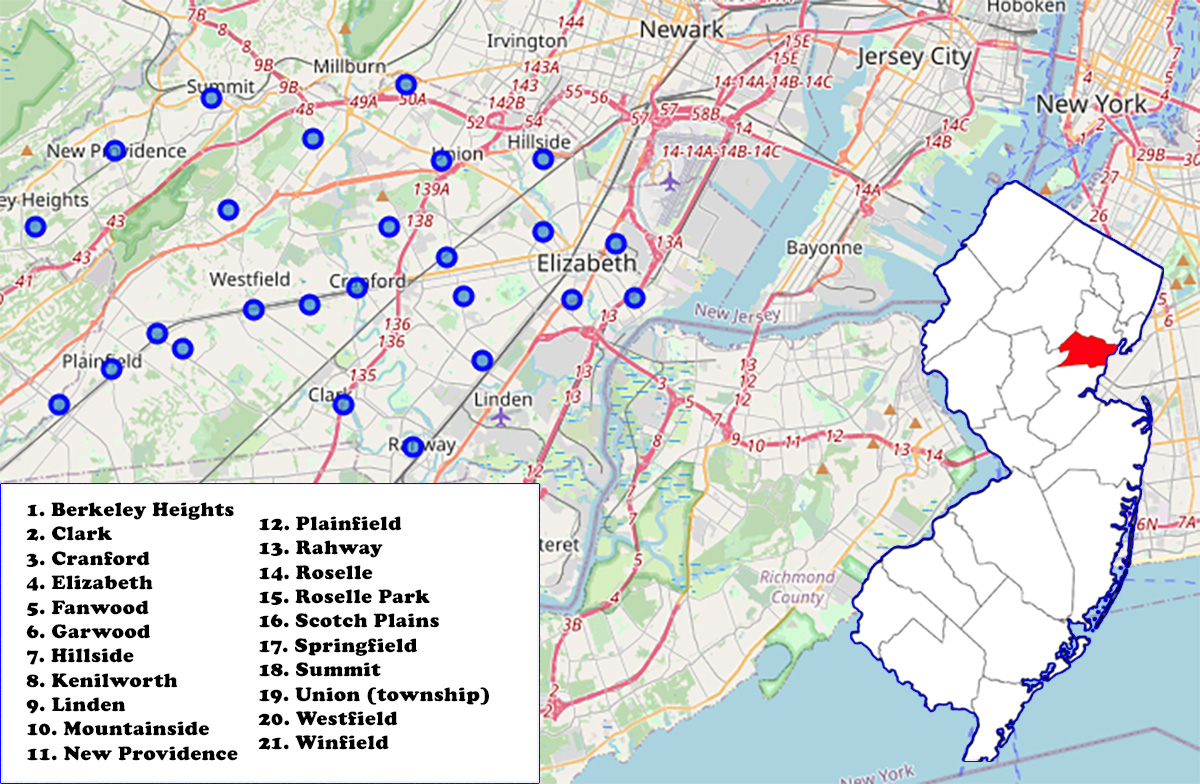